In [2]:
#selling pice of used car
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from flask import Flask,request,render_template,jsonify

In [3]:
df =pd.read_csv('car_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [7]:
#list comprehension for object fields only
print(df.columns)
feature_obj =[features for features  in df.columns if df[features].dtypes=='object']



Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [8]:
feature_obj

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [9]:
y1=df.loc[:,'Selling_Price']
y1

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [10]:
y2 = df.Selling_Price
y2

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [11]:
df.iloc[:,2:3]

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [12]:
X=df.iloc[:,3:]
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.59,27000,Petrol,Dealer,Manual,0
1,9.54,43000,Diesel,Dealer,Manual,0
2,9.85,6900,Petrol,Dealer,Manual,0
3,4.15,5200,Petrol,Dealer,Manual,0
4,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...
296,11.60,33988,Diesel,Dealer,Manual,0
297,5.90,60000,Petrol,Dealer,Manual,0
298,11.00,87934,Petrol,Dealer,Manual,0
299,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.shape

(301, 9)

In [16]:
#unique values for each feature
dict1 =dict()
for x in feature_obj:
    dict1[x] =df[x].unique()
    
print(dict1)

{'Car_Name': array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apac

In [18]:
#unique values for object features
#'Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'

df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [19]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
df['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [22]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [23]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
#add a new feature
final_dataset['current_year']= 2021
final_dataset['no_of_years']=final_dataset['current_year']- final_dataset['Year']

print(final_dataset)

     Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  current_year  no_of_years  
0         Manual      

In [25]:
final_dataset.drop(['Year','current_year'],axis=1,inplace=True)
print(final_dataset)

     Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0             3.35           5.59       27000    Petrol      Dealer   
1             4.75           9.54       43000    Diesel      Dealer   
2             7.25           9.85        6900    Petrol      Dealer   
3             2.85           4.15        5200    Petrol      Dealer   
4             4.60           6.87       42450    Diesel      Dealer   
..             ...            ...         ...       ...         ...   
296           9.50          11.60       33988    Diesel      Dealer   
297           4.00           5.90       60000    Petrol      Dealer   
298           3.35          11.00       87934    Petrol      Dealer   
299          11.50          12.50        9000    Diesel      Dealer   
300           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  no_of_years  
0         Manual      0            7  
1         Manual      0            8  
2         Manual      0       

In [26]:
print(feature_obj)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [27]:
#unique values for Fuel_Type,	Seller_Type,	Transmission
fuel = df.Fuel_Type.unique()
seller = df.Seller_Type.unique()
transmission = df.Transmission.unique()
print(fuel,"\n", seller,"\n", transmission)

['Petrol' 'Diesel' 'CNG'] 
 ['Dealer' 'Individual'] 
 ['Manual' 'Automatic']


In [28]:
#create dummies

print(pd.get_dummies(final_dataset))

     Selling_Price  Present_Price  Kms_Driven  Owner  no_of_years  \
0             3.35           5.59       27000      0            7   
1             4.75           9.54       43000      0            8   
2             7.25           9.85        6900      0            4   
3             2.85           4.15        5200      0           10   
4             4.60           6.87       42450      0            7   
..             ...            ...         ...    ...          ...   
296           9.50          11.60       33988      0            5   
297           4.00           5.90       60000      0            6   
298           3.35          11.00       87934      0           12   
299          11.50          12.50        9000      0            4   
300           5.30           5.90        5464      0            5   

     Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Dealer  \
0                0                 0                 1                   1   
1              

In [29]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)
print(final_dataset)

     Selling_Price  Present_Price  Kms_Driven  Owner  no_of_years  \
0             3.35           5.59       27000      0            7   
1             4.75           9.54       43000      0            8   
2             7.25           9.85        6900      0            4   
3             2.85           4.15        5200      0           10   
4             4.60           6.87       42450      0            7   
..             ...            ...         ...    ...          ...   
296           9.50          11.60       33988      0            5   
297           4.00           5.90       60000      0            6   
298           3.35          11.00       87934      0           12   
299          11.50          12.50        9000      0            4   
300           5.30           5.90        5464      0            5   

     Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                   0                 1                       0   
1                   1                

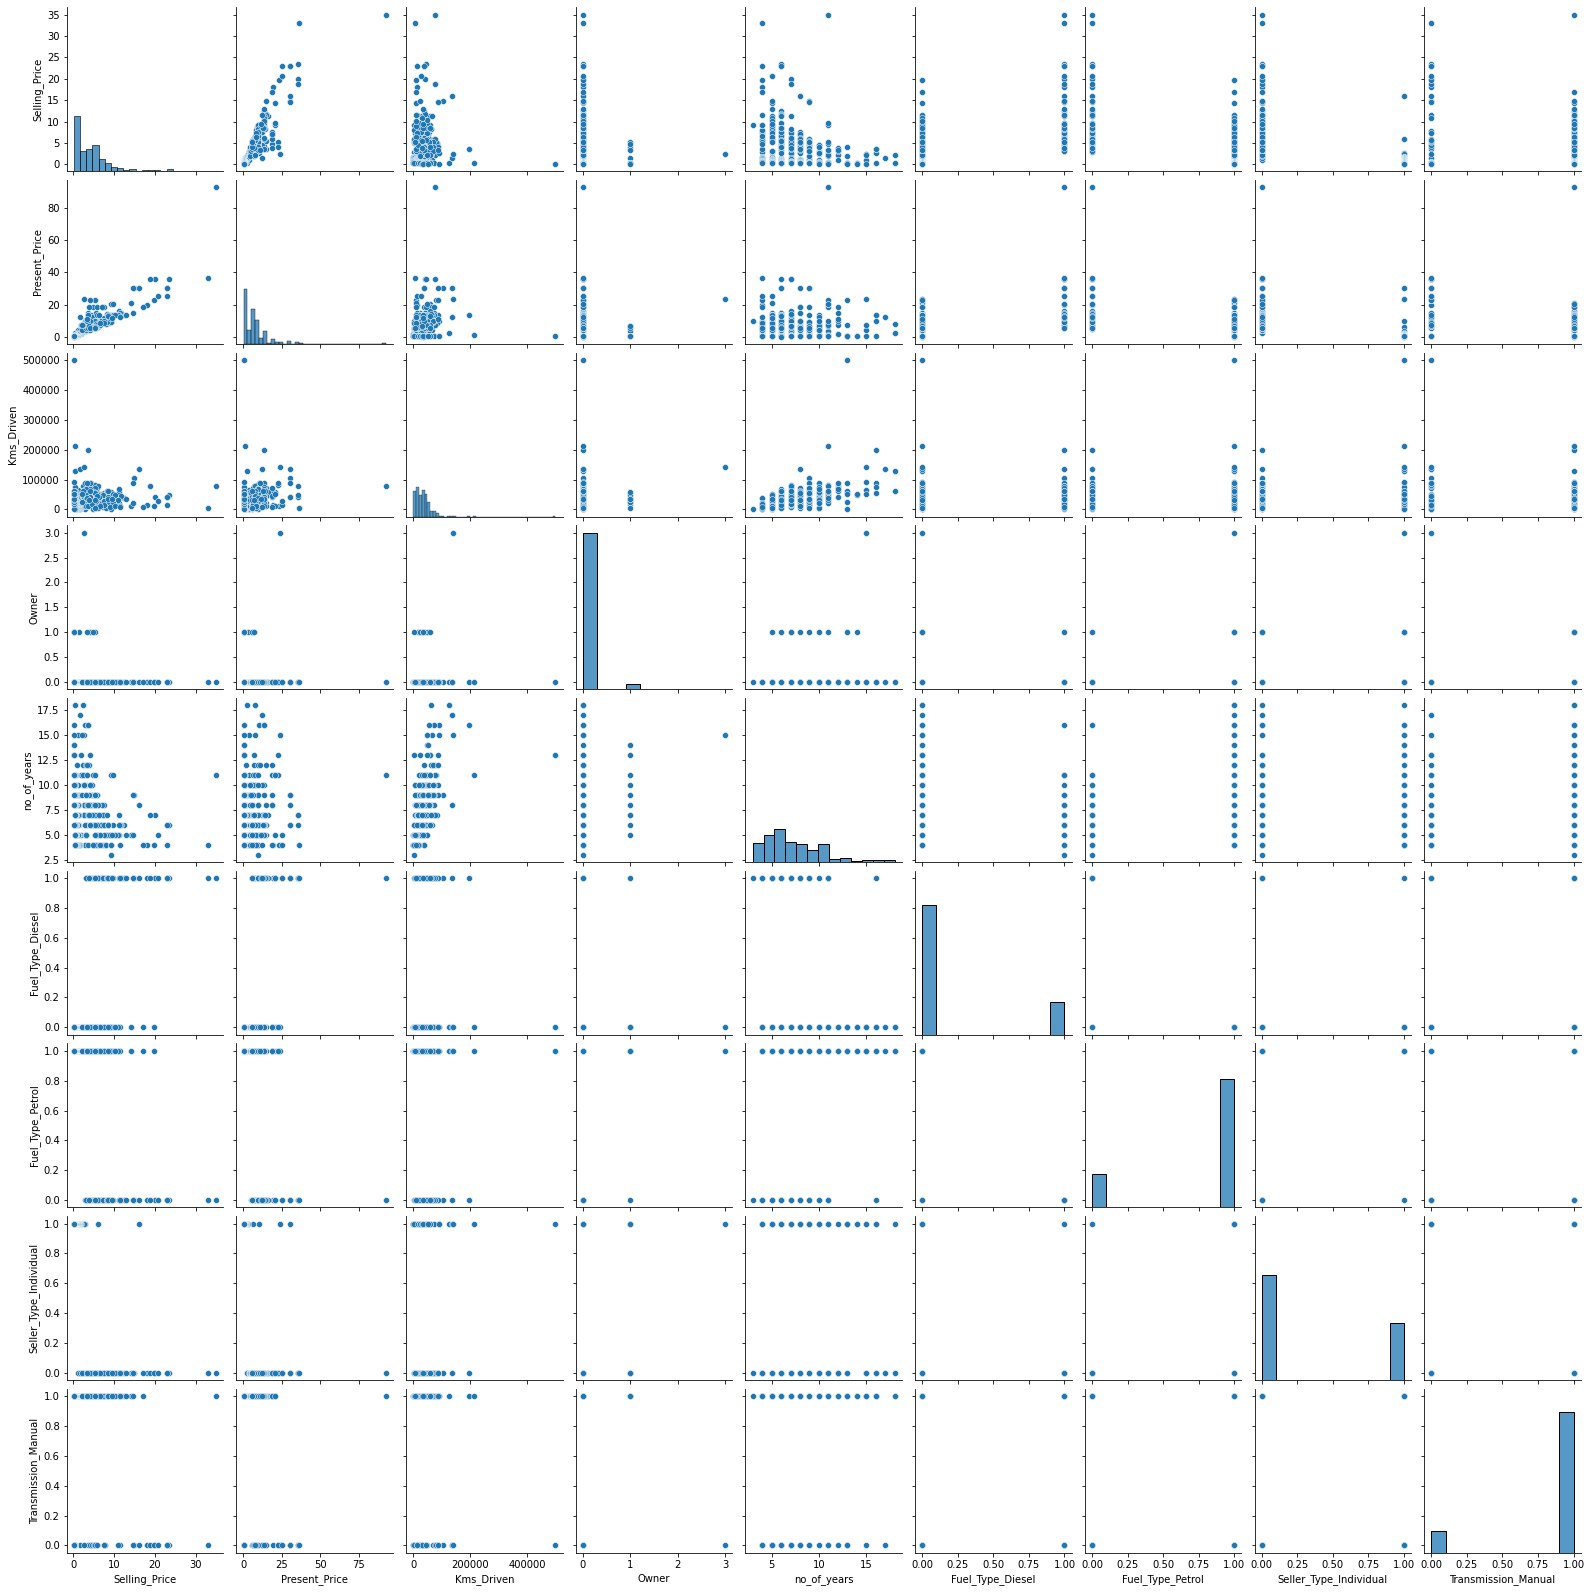

In [30]:
#correlations
#pairplots and heatmap
import seaborn as sns
sns.pairplot(final_dataset)
                                                                                                                                                                                                                   

In [31]:
#plot heatmap correlation matrix
corrplot =final_dataset.corr()
print(corrplot)
corr_features = corrplot.index
print(corr_features)


                        Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
no_of_years                 -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        no_of_years  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price             -0.236141          0.552339         -0.540571   
Present_Price              0.047584          0.473306         -0.4652

<AxesSubplot:>

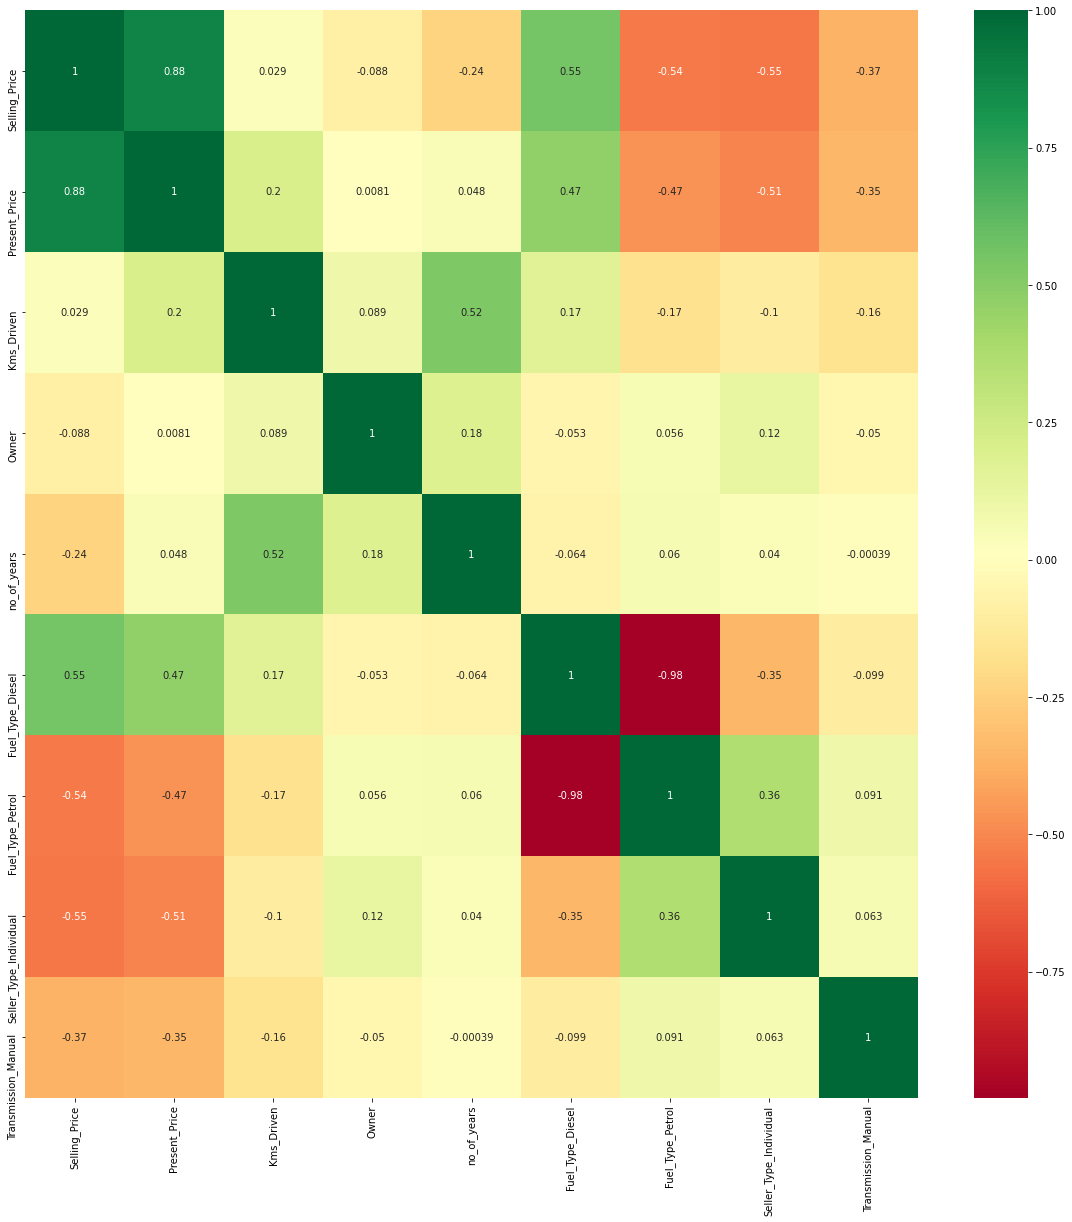

In [32]:
plt.figure(figsize=(20,20))
#sns.heatmap(final_dataset.corr(),annot=True)
sns.heatmap(final_dataset[corr_features].corr(),annot=True,cmap='RdYlGn')

In [33]:
correlation =final_dataset.corr()
correlation

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [34]:
correlation.index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'no_of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

<AxesSubplot:>

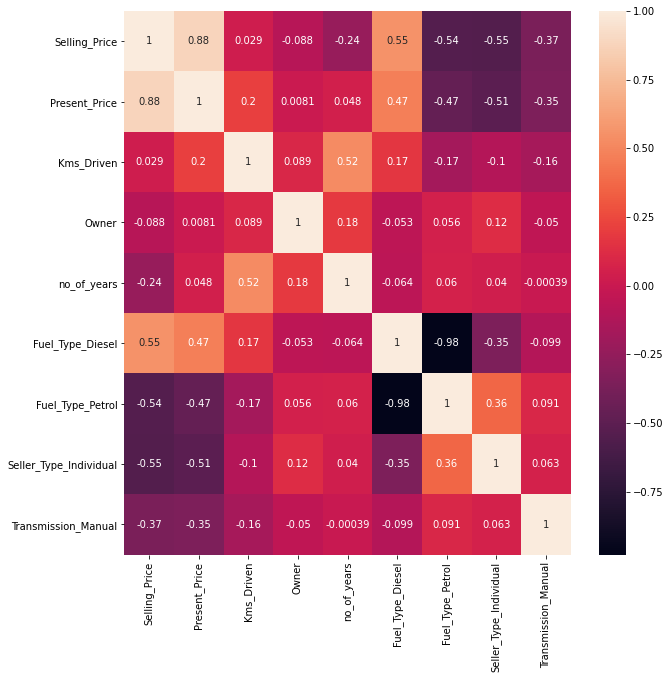

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

In [36]:
final_dataset.head()
X=final_dataset.iloc[:,1:]
#print(final_dataset)
y=final_dataset.loc[:,'Selling_Price']
y=final_dataset.iloc[:,0]
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [37]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
imp_feat = model.feature_importances_

In [ ]:
print(imp_feat)

In [ ]:
print(X.columns)

In [ ]:
#plt.figure(figsize=(5,5))
pd.Series(imp_feat,index=X.columns).nlargest(10).plot(kind='bar')

In [ ]:
#convert to series 

pd.Series(imp_feat,index=X.columns).nlargest(10).plot(kind='barh')
#plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train,X_test,y_train,y_test)




In [ ]:
#car prediction is done using regressor since it is  regression problem 
#we use random forest hence no scaling is needed

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [ ]:
#hypertuning parameters
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
print(max_depth)

In [ ]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:

rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(X_test)
predictions

In [ ]:
#distribution
sns.distplot(y_test-predictions)
#difference should be minimal

In [ ]:
#plotting
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#create pickle file for the model
 
randomforestfile = open('random_forest_regressor_model.pkl','wb')
pickle.dump(rf_random, randomforestfile)